ビデオ画像のリアルタイム取得を行う

In [2]:
# UI表示などを行うためのモジュールを読み込む
from uikit.ui_uiview import *

# ビデオ画像のリアルタイム取得を行うためのモジュール
from avfoundation.video_capture_ex import *
import time

# 画面サイズを取得する
size = get_screen_bounds().size

# プレビュー表示用のUIViewを作成する
ui_view = create_uiview(
    rect=CGRect( CGPoint(size.width/4/2, size.height/4/2),
                 CGSize(3*size.width/4,  3*size.height/4)),
    name='sample',  # UIViewの名前（特に使わない）
    color=UIColor.color(red=0,green=0,blue=0,alpha=1) )

In [3]:
import copy

# 色画像が渡されるとリストに追加する
def process_image(npimg): 
    images.append(copy.copy(npimg))

In [4]:
# カメラ画像を入れておくリストを用意
images = []

AVCaptureVideoCaptureEx_=AVCaptureVideoCaptureEx(
    # 取得デバイス
    AVCaptureDeviceTypeBuiltInWideAngleCamera, 
    # カメラ位置
    AVCaptureDevicePositionBack,
    # 取得画像サイズ
    'AVCaptureSessionPreset640x480',
    # 画像色フォーマット
    CV32BGRA,
    # 取得画像を使った処理を行うユーザ関数
    process_image,
    # UIViewへの表示画像を生成するユーザ関数
    None,
    # 取得画像を表示するUIView
    ui_view )

In [5]:
# 撮影開始, 撮影インターバルを秒で指定
AVCaptureVideoCaptureEx_.video_shooting_start(0.1) 
time.sleep(2) # 2秒間にわたり撮影を行う
# 撮影を終了する
AVCaptureVideoCaptureEx_.video_shooting_close(ui_view)

processed_frames:12


In [6]:
l = len(images)         # 取得した画像の枚数
h, w = images[0]['video'].shape  # 取得した画像の縦・横サイズ
print("{:d} images are captured.".format(l))
print("height:{:d} pixels x width:{:d} pixels".format(h, w))

13 images are captured.
height:640 pixels x width:1920 pixels


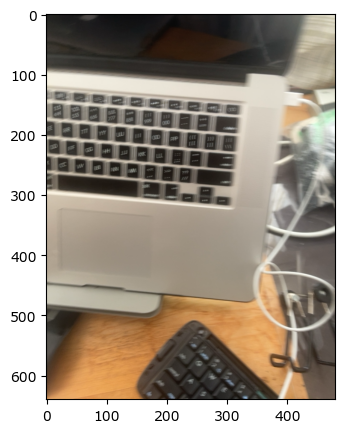

In [10]:
# matplotlibを使って画像を表示する
from matplotlib import pylab as plt
import cv2

# 取得画像は色順がBGRAのInterleaved形式なので
# Interleaved形式のRGBA画像に変換する
rgba_image = cv2.cvtColor( 
    images[0]['video'].reshape(h,int(w/4),4), 
    cv2.COLOR_RGBA2BGRA)

# matplotlibで画像を表示する
plt.figure(figsize=[5,5])
plt.imshow(rgba_image)